In [1]:
#Importar y instalar librerias
import sys
import os
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.python.keras import applications# modelos pre entrendado de Keras

In [2]:
vgg=applications.vgg16.VGG16()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
#Crear nuestra variable
cnn=Sequential()
for capa in vgg.layers:
    cnn.add(capa)

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [6]:
cnn.pop()

In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [10]:
for layer in cnn.layers:
    layer.trainable=False

In [11]:
cnn.add(Dense(2,activation='softmax'))

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [13]:
K.clear_session()
#Exportar el dataset de imagenes
data_entrenamiento = '/home/mirefresa/Documentos/prueba/data/entrenamiento'
data_validacion = '/home/mirefresa/Documentos/prueba/data/validacion'

In [14]:
""" Parameters """
epocas= 10 #20
longitud, altura = 224, 224 #150,150
batch_size = 32
pasos = 500 #1000
validation_steps =300 #300 CAMBIO
filtrosConv1 = 32
filtrosConv2 = 64
tamano_filtro1 = (3, 3)
tamano_filtro2 = (2, 2)
tamano_pool = (2, 2)
clases = 2
lr = 0.0004

In [15]:
#Preparamos nuestras imagenes
entrenamiento_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [16]:
entrenamiento_generador = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

Found 137 images belonging to 2 classes.


In [17]:
validacion_generador = test_datagen.flow_from_directory(
    data_validacion,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

Found 122 images belonging to 2 classes.


In [18]:
def modelo():
    vgg=applications.vgg16.VGG16()
    cnn=Sequential()
    for capa in vgg.layers:
        cnn.add(capa)
    cnn.layers.pop()
    for layer in cnn.layers:
        layer.trainable=False
    cnn.add(Dense(2,activation='softmax'))
    
    return cnn

In [19]:
cnn=modelo()

In [20]:
cnn.compile(loss='categorical_crossentropy',
            optimizer=optimizers.Adam(lr=lr),
            metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 

In [22]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = cnn.fit_generator(entrenamiento_generador,steps_per_epoch=pasos, validation_data=validacion_generador, validation_steps=validation_steps,epochs=epocas,callbacks=[checkpoint,early])

Epoch 1/10
300/500 [=================>............] - ETA: 22:04 - loss: 0.6938 - acc: 0.5082
Epoch 00001: val_acc improved from -inf to 0.50820, saving model to vgg16_1.h5
500/500 [==============================] - 4922s 10s/step - loss: 0.6908 - acc: 0.5622 - val_loss: 0.6938 - val_acc: 0.5082
Epoch 2/10
300/500 [=================>............] - ETA: 21:11 - loss: 0.6935 - acc: 0.5492
Epoch 00002: val_acc improved from 0.50820 to 0.54918, saving model to vgg16_1.h5
500/500 [==============================] - 4824s 10s/step - loss: 0.6874 - acc: 0.6636 - val_loss: 0.6935 - val_acc: 0.5492
Epoch 3/10
300/500 [=================>............] - ETA: 21:10 - loss: 0.6934 - acc: 0.5656
Epoch 00003: val_acc improved from 0.54918 to 0.56557, saving model to vgg16_1.h5
500/500 [==============================] - 4810s 10s/step - loss: 0.6840 - acc: 0.6758 - val_loss: 0.6934 - val_acc: 0.5656
Epoch 4/10
300/500 [=================>............] - ETA: 21:33 - loss: 0.6947 - acc: 0.5328
Epoch 000

In [23]:
import matplotlib.pyplot as plt

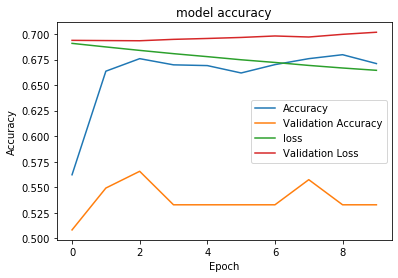

In [24]:
#visualización de precisión y perdida del entrenamiento
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [25]:
#Guardar modelo entrenado
target_dir = '/home/mirefresa/Prueba_M/modelo/'

In [26]:
if not os.path.exists(target_dir):
    os.mkdir(target_dir)
cnn.save('/home/mirefresa/Prueba_M/modelo/vgg16_1.h5')
cnn.save_weights('/home/mirefresa/Prueba_M/modelo/vpesos.h5')